https://otexts.com/fppkr/stationarity.html

### auto correration function(자기 상관 그래프)

$$ 
\begin{align}
autocovariance function:  C_{h} = \dfrac{1}{N}\sum_{t=1}^{N-h} (Y_{t} - \bar{Y} )(Y_{t+h} - \bar{Y} ) 
\tag{1}
\end{align}
$$

$$ 
\begin{align}
variance function:  C_{0} = \dfrac{1}{N}\sum_{t=1}^{N} (Y_{t} - \bar{Y} )^2 
\tag{2}
\end{align}
$$

$$ 
\begin{align}
autocorrelation coefficient:  R_{h} = \dfrac{Autocovariance}{Variance} = \dfrac{ C_{h} }{C_{0} }
\tag{3}
\end{align}
$$

AR,MA를 지정한뒤 ACF와 PACF의 그래프를 그려보면 ARMA모형의 적합성을 판단할 수 있다.  
모델 적합성의 가장 큰 증거는 ACF가 점차 감소하는 모습을 띄는 것이다.

MA 자기 상관의 본질

```
•시계열자료(time-series data)를 다루는 경우
항상 연속되는 오차항들이 서로 상관되어 있을
가능성이 존재함


• 어떤 특정 시점에서 해당 시점의 오차항은 해
당 시점의 충격 뿐 아니라 과거로부터의 충격
으로부터 이전된 영향들도 포함함


• 이러한 이전된 영향으로 인해 해당 시점의 충
격은 과거의 충격들과 상관될 것이며, 이러한
상황은 오차항들이 상관을 낳게됨

• 이 경우 자기상관이 존재한다고 함

• 양(positive)의 자기상관과 음(negative)의 자
기상관이 존재할 수 있음



```

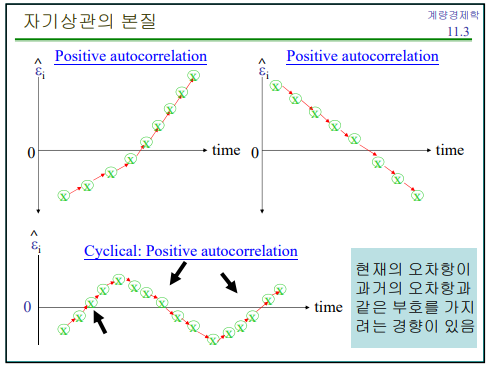

In [7]:
# pip install statsmodels

  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels import tools
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
import numpy as np
from warnings import filterwarnings
# filterwarnings("ignore")
# plt.figure(figsize=(15,15))

In [9]:
birthDF = pd.read_csv('data/daily-total-female-births.txt',index_col='Date')
birthDF

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [10]:
birthDF.index  # => date타입이 날짜형이어야함.

Index(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04', '1959-01-05',
       '1959-01-06', '1959-01-07', '1959-01-08', '1959-01-09', '1959-01-10',
       ...
       '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25', '1959-12-26',
       '1959-12-27', '1959-12-28', '1959-12-29', '1959-12-30', '1959-12-31'],
      dtype='object', name='Date', length=365)

In [11]:
birthDF = pd.read_csv('data/daily-total-female-births.txt',index_col='Date',parse_dates=['Date']  )
birthDF

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [12]:
birthDF.index  # => date타입이 날짜형이어야함.

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [13]:
tempDF = pd.read_csv('data/daily-min-temperatures.csv',index_col='date')
tempDF

,Temp
date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [14]:
airDF = pd.read_csv('data/international-airline-passengers.txt',index_col='time')
airDF

,passengers
time,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [15]:
tempDF = pd.read_csv('data/daily-min-temperatures.csv',index_col='date',parse_dates=['date']  ) 
tempDF

,Temp
date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [16]:
n = len(birthDF) //2
n

182

In [17]:
birthDF.iloc[:n]

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-06-27,43
1959-06-28,41
1959-06-29,41


# Stationary

In [18]:
birthDF.iloc[:n].mean()

Births    39.763736
dtype: float64

In [19]:

print(birthDF.iloc[:n].mean())
print(birthDF.iloc[:n].var())
print('========================')
print(birthDF.iloc[n:].mean())
print(birthDF.iloc[n:].var())

Births    39.763736
dtype: float64
Births    49.485308
dtype: float64
Births    44.185792
dtype: float64
Births    48.976281
dtype: float64


In [20]:

n = len(tempDF)//2

print(tempDF.iloc[:n].mean()) # 평균
print(tempDF.iloc[:n].var()) # 분산
print('============================')
print(tempDF.iloc[n:].mean())
print(tempDF.iloc[n:].var())

Temp    11.043507
dtype: float64
Temp    18.170782
dtype: float64
Temp    11.312
dtype: float64
Temp    14.961956
dtype: float64


# non - Stationary

In [21]:
n = len(airDF) //2


print(airDF.iloc[:n].mean())
print(airDF.iloc[:n].var())
print('========================')
print(airDF.iloc[n:].mean())
print(airDF.iloc[n:].var())

passengers    182.902778
dtype: float64
passengers    2275.69464
dtype: float64
passengers    377.694444
dtype: float64
passengers    7471.736307
dtype: float64


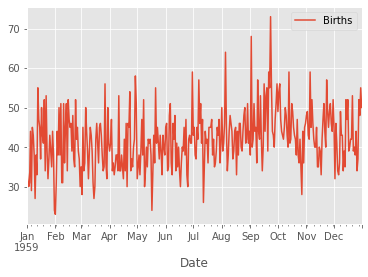

In [22]:
birthDF.plot()
plt.show()

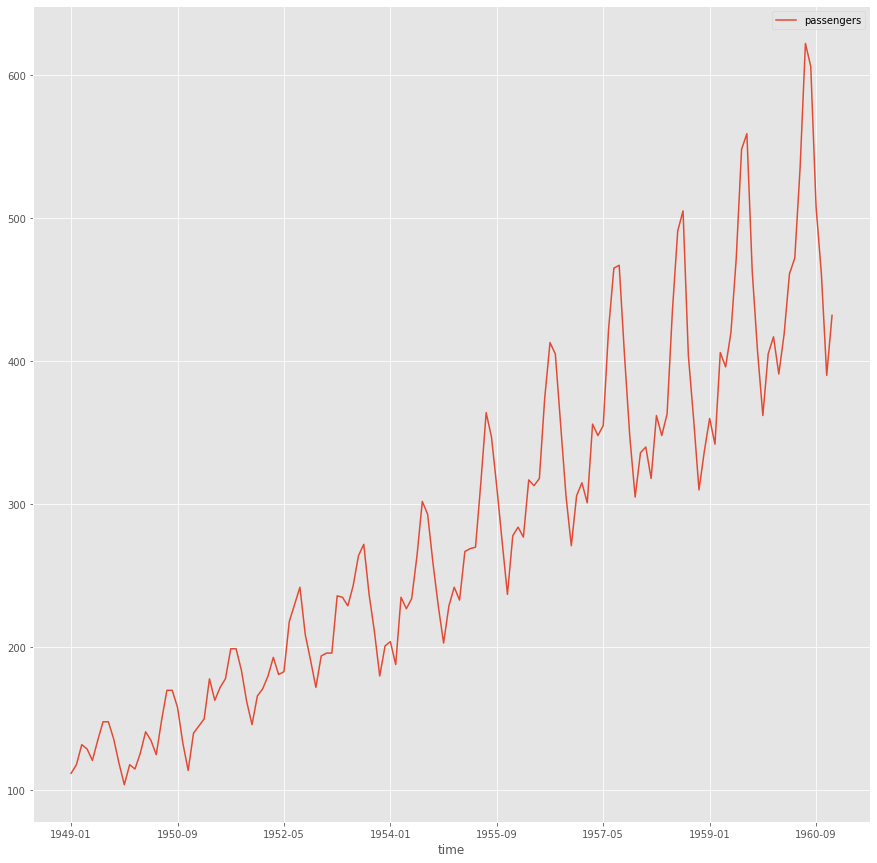

In [23]:
airDF.plot(figsize=(15,15))
plt.show()

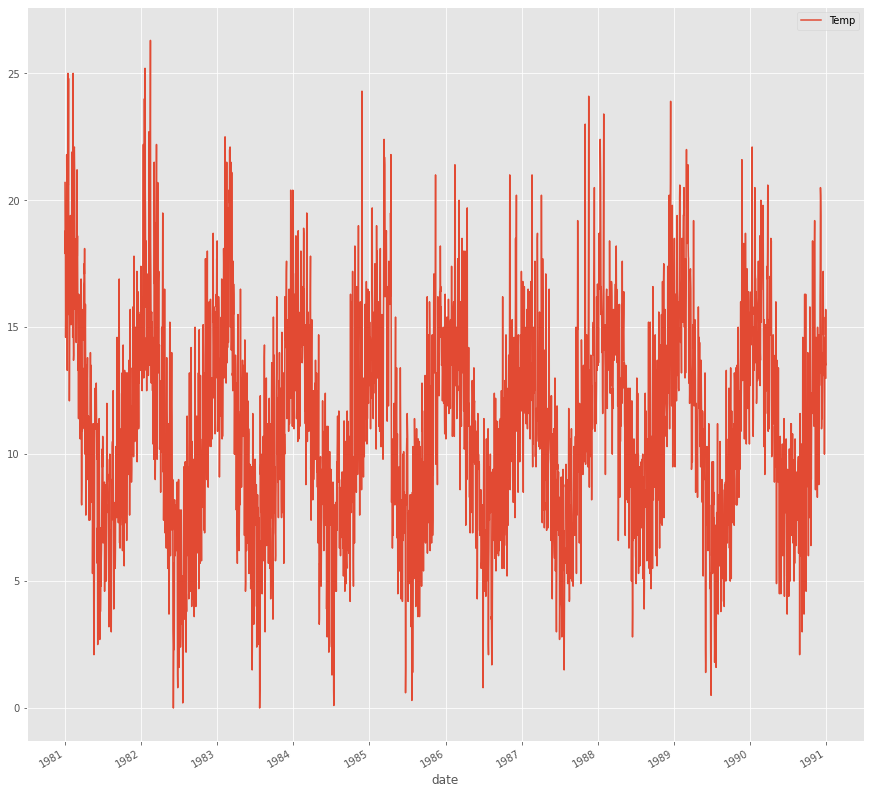

In [24]:
tempDF.plot(figsize=(15,15))
plt.show()

In [25]:
tempDF['days'] = range(0, len(tempDF))
tempDF

,Temp,days
date,,
1981-01-01,20.7,0
1981-01-02,17.9,1
1981-01-03,18.8,2
1981-01-04,14.6,3
1981-01-05,15.8,4
...,...,...
1990-12-27,14.0,3645
1990-12-28,13.6,3646
1990-12-29,13.5,3647


In [26]:
temps = tempDF['Temp'].values
temps

array([20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ])

In [27]:
tempDF

,Temp,days
date,,
1981-01-01,20.7,0
1981-01-02,17.9,1
1981-01-03,18.8,2
1981-01-04,14.6,3
1981-01-05,15.8,4
...,...,...
1990-12-27,14.0,3645
1990-12-28,13.6,3646
1990-12-29,13.5,3647


lag = 예측변수의 시차


In [28]:
temps[1:]  

array([17.9, 18.8, 14.6, ..., 13.5, 15.7, 13. ])

In [29]:
temps[:-1]

array([20.7, 17.9, 18.8, ..., 13.6, 13.5, 15.7])

In [30]:
np.corrcoef(temps[1:], temps[:-1])[0,1] # lag1에 대한 오토코릴레이션 (자기상관)

0.7748702165384456

In [31]:
np.corrcoef(temps[2:], temps[:-2])[0,1] # lag2에 대한 오토코릴레이션 # 자기와 자기간의 상관관계(시간차에 따른)

0.6311194620684837

In [32]:
np.corrcoef(temps[3:], temps[:-3])[0,1] # lag3에 대한 오토코릴레이션

0.5863748620126278

In [33]:
autocorrelation = []
for shift in range(1, 10):
    c = np.corrcoef(temps[:-shift], temps[shift:])[0,1] # R = corrcoef(A)는 A에 대한 상관 계수 행렬을 반환
    autocorrelation.append(c)
autocorrelation

[0.7748702165384457,
 0.6311194620684836,
 0.5863748620126278,
 0.5788976133377621,
 0.578571574411206,
 0.5765484145122557,
 0.575928953583158,
 0.5695569780397494,
 0.5634747178408281]

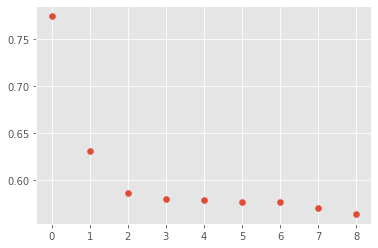

In [34]:
plt.scatter( range(0,len(autocorrelation) ), autocorrelation)
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, acf

In [36]:
result = acf( tempDF['Temp'] )
result

array([1.        , 0.774268  , 0.6302866 , 0.58529312, 0.57774567,
       0.57728013, 0.57510412, 0.57437039, 0.56782622, 0.56120131,
       0.54668689, 0.53793111, 0.54012564, 0.54247126, 0.53688723,
       0.53429917, 0.53043593, 0.52911166, 0.53037444, 0.52280732,
       0.52303677, 0.52224579, 0.51426684, 0.49837745, 0.49302665,
       0.49946731, 0.50428521, 0.50068173, 0.49157081, 0.48146406,
       0.47421245, 0.47568054, 0.46311862, 0.46215585, 0.46630567,
       0.45459092])

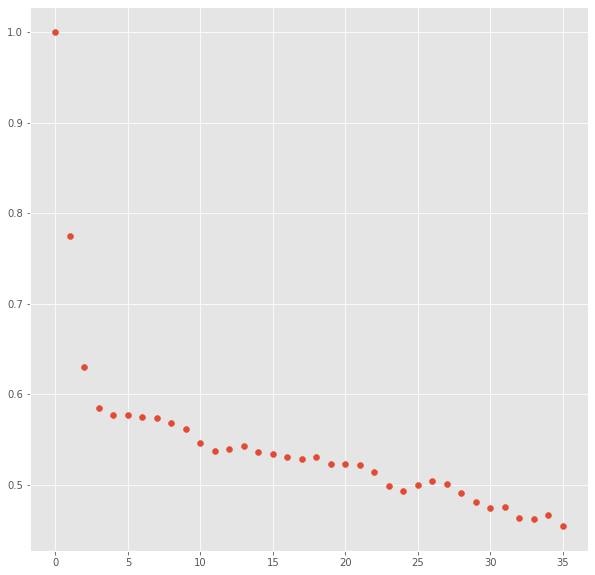

In [37]:
plt.scatter( range(0,len(result) ), result)
plt.show()

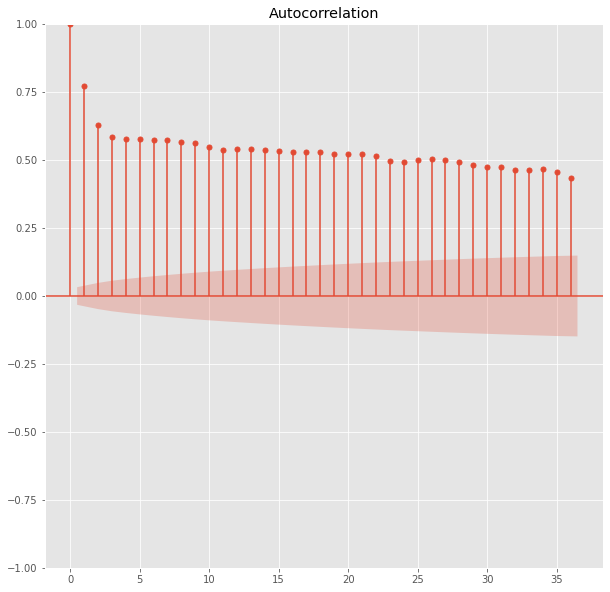

In [38]:
plot_acf( tempDF['Temp'] )
plt.show()

### adfuller 판단지표
- 검증 조건 ( p-value : 5% 이내면 reject(기각)으로 대체가설 선택됨 )
- 귀무가설(H0): non-stationary.
- 대체가설 (H1): stationary.

In [39]:
from statsmodels.tsa.stattools import adfuller

In [40]:
result = adfuller( birthDF['Births'] )
print( result[0] ) # adf ( 적을수록:귀무가설을 기각시킬 확율이 높다 )
print( result[1] ) # p-value

-4.808291253559763
5.243412990149865e-05


In [41]:
result = adfuller( airDF['passengers'] )
print( result[0] ) # adf ( 적을수록:귀무가설을 기각시킬 확율이 높다 )
print( result[1] ) # p-value

0.8153688792060569
0.9918802434376411


In [42]:
temps

array([20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ])

In [43]:
birthDF.shape

(365, 1)

# AR
- 다중선형회귀

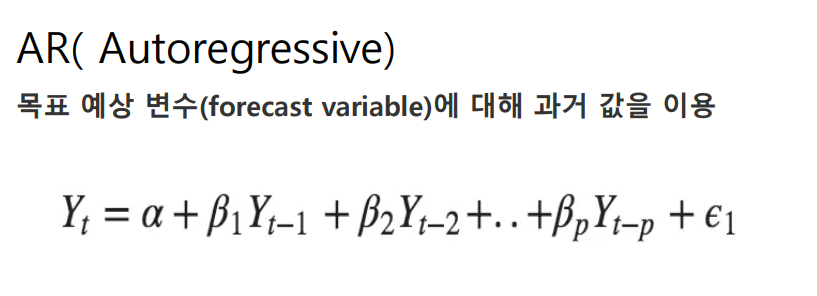

```
 정상성(stationarity)을 나타내는 시계열은 시계열의 특징이 해당 시계열이 관측된 시간에 무관
- 추세나 계절성이 있는 시계열은 정상성을 나타내는 시계열이 아닙니다
```

# ARIMA


ARIMA(2,1,2)
\begin{equation}
y_t = 1.6477 y'_{t-1} -0.9094 y'_{t-2} + e_t -1.9101e_{t-1} +0.9999e_{t-2}
\end{equation}
</h3>
를 따르는 ARIMA모델임을 확인할 수 있다.

In [44]:
airDF

,passengers
time,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [45]:
pip install statsmodels==0.12.2

  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'c:\\users\\tfg5076xg\\anaconda3\\envs\\gpu\\lib\\site-packages\\~tatsmodels\\tsa\\_innovations.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [46]:
import statsmodels as sm
sm.__version__

'0.13.2'

In [47]:
from statsmodels.tsa.arima.model import ARIMA
order=(2,1,2)
model = ARIMA(airDF,order=order)
rfit = model.fit()

C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  inferred_freq = False
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  inferred_freq = False
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  inferred_freq = False
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\base\optimizer.py:23: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include

In [48]:
rfit.aic  # aic 가장 작읎 값으로 

1353.346640779761

In [49]:
def arima_aic_check(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p:{p} d:{d} q:{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df

In [50]:
arima_aic_check(airDF, [3,3,3])

C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  inferred_freq = False
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  inferred_freq = False
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  inferred_freq = False
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  inferred_freq = False
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so infer

C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  inferred_freq = False
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  inferred_freq = False
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  inferred_freq = False
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  inferred_freq = False
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so infer

,order,AIC
23,p:2 d:1 q:2,1353.346641
22,p:2 d:1 q:1,1378.338320
14,p:1 d:1 q:2,1385.497545
17,p:1 d:2 q:2,1391.908427
26,p:2 d:2 q:2,1392.656889
25,p:2 d:2 q:1,1393.886573
8,p:0 d:2 q:2,1394.372843
13,p:1 d:1 q:1,1394.682505
21,p:2 d:1 q:0,1396.587695
5,p:0 d:1 q:2,1397.093462


```
from statsmodels.tsa.arima import ARIMA
0.13버젼 이상
시계열 예측 : ARIMA, fbprobhet, RNN

```

In [51]:
df = pd.DataFrame([
        ['2001-11-01', 0.998543],
        ['2001-11-02', 1.914526],
        ['2001-11-03', 3.057407],
        ['2001-11-04', 4.044301],
        ['2001-11-05', 4.952441],
        ['2001-11-06', 6.002932],
        ['2001-11-07', 6.930134],
        ['2001-11-08', 8.011137],
        ['2001-11-09', 9.040393],
        ['2001-11-10', 10.097007],
        ['2001-11-11', 11.063742],
        ['2001-11-12', 12.051951],
        ['2001-11-13', 13.062637],
        ['2001-11-14', 14.086016],
        ['2001-11-15', 15.096826],
        ['2001-11-16', 15.944886],
        ['2001-11-17', 17.027107],
        ['2001-11-18', 17.930240],
        ['2001-11-19', 18.984202],
        ['2001-11-20', 19.971603]
    ], columns=['date', 'count'])
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
df = df.set_index('date')
print(df)

                count
date                 
2001-11-01   0.998543
2001-11-02   1.914526
2001-11-03   3.057407
2001-11-04   4.044301
2001-11-05   4.952441
2001-11-06   6.002932
2001-11-07   6.930134
2001-11-08   8.011137
2001-11-09   9.040393
2001-11-10  10.097007
2001-11-11  11.063742
2001-11-12  12.051951
2001-11-13  13.062637
2001-11-14  14.086016
2001-11-15  15.096826
2001-11-16  15.944886
2001-11-17  17.027107
2001-11-18  17.930240
2001-11-19  18.984202
2001-11-20  19.971603


## 퀴즈
## acf 


In [52]:
df['count']

date
2001-11-01     0.998543
2001-11-02     1.914526
2001-11-03     3.057407
2001-11-04     4.044301
2001-11-05     4.952441
2001-11-06     6.002932
2001-11-07     6.930134
2001-11-08     8.011137
2001-11-09     9.040393
2001-11-10    10.097007
2001-11-11    11.063742
2001-11-12    12.051951
2001-11-13    13.062637
2001-11-14    14.086016
2001-11-15    15.096826
2001-11-16    15.944886
2001-11-17    17.027107
2001-11-18    17.930240
2001-11-19    18.984202
2001-11-20    19.971603
Name: count, dtype: float64

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, acf
result = acf( df['count'] )
result

array([ 1.        ,  0.85051096,  0.70111766,  0.55770427,  0.41727086,
        0.28272744,  0.15409016,  0.03335875, -0.07545946, -0.17166745,
       -0.25369122, -0.32166247, -0.37250429, -0.40465095])

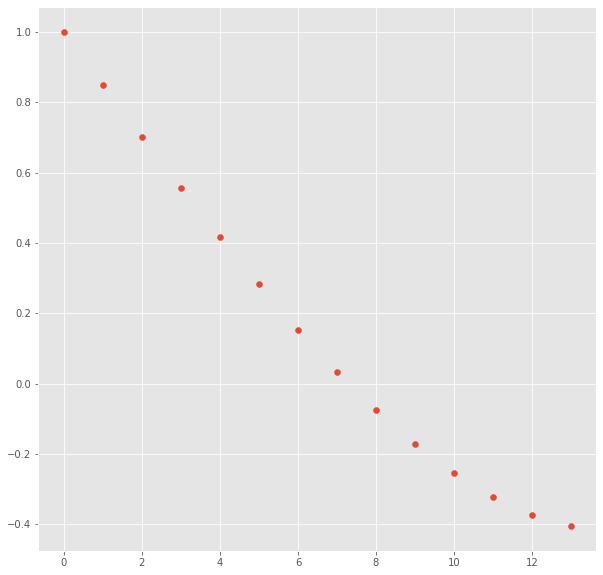

In [54]:
plt.scatter( range(0,len(result) ), result)
plt.show()

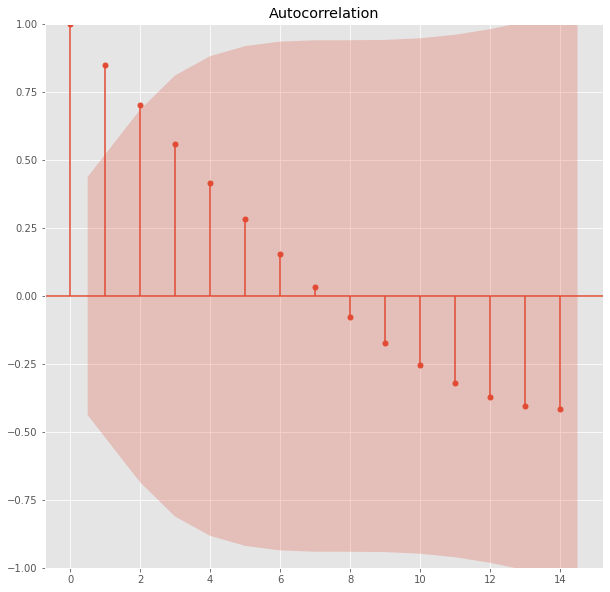

In [55]:
plot_acf( df['count'] )
plt.show()

## adfuller:  

In [56]:
from statsmodels.tsa.stattools import adfuller
result = adfuller( df['count'] )
print( 'adf:', result[0] ) # adf ( 적을수록:귀무가설을 기각시킬 확율이 높다 )
print( 'p-value:' ,result[1] ) # p-value

adf: -7.573269903543583
p-value: 2.804546459135478e-11


## pdq값  

In [57]:
def arima_aic_check(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p:{p} d:{d} q:{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df

In [58]:
arima_aic_check( df, [3, 3, 3])

C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  inferred_freq = False
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  inferred_freq = False
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  inferred_freq = False
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\base\optimizer.py:23: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: e

C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  """
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  inferred_freq = False
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  inferred_freq = False
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  inferred_freq = False
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
 

C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  """
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  inferred_freq = False
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  inferred_freq = False
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  inferred_freq = False
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
 

,order,AIC
16,p:1 d:2 q:1,-38.849035
8,p:0 d:2 q:2,-38.358860
17,p:1 d:2 q:2,-36.895204
25,p:2 d:2 q:1,-36.890412
26,p:2 d:2 q:2,-36.475953
7,p:0 d:2 q:1,-35.652642
24,p:2 d:2 q:0,-34.923557
22,p:2 d:1 q:1,-33.902371
14,p:1 d:1 q:2,-33.491365
15,p:1 d:2 q:0,-32.849810


aic가장 작은값 -> 011

## arima모델로 예측( 2001-11-13, 2001-11-20)  

In [59]:
from statsmodels.tsa.arima.model import ARIMA
order=(0,1,1)
model = ARIMA(df,order=order)
rfit = model.fit()

C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  inferred_freq = False
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  inferred_freq = False
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  inferred_freq = False
C:\Users\TFG5076XG\anaconda3\envs\gpu\lib\site-packages\statsmodels\base\optimizer.py:23: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: e

In [60]:
rfit.predict('20200202', '20200219', typ= 'levels')


2020-02-02    20.234869
2020-02-03    20.234869
2020-02-04    20.234869
2020-02-05    20.234869
2020-02-06    20.234869
2020-02-07    20.234869
2020-02-08    20.234869
2020-02-09    20.234869
2020-02-10    20.234869
2020-02-11    20.234869
2020-02-12    20.234869
2020-02-13    20.234869
2020-02-14    20.234869
2020-02-15    20.234869
2020-02-16    20.234869
2020-02-17    20.234869
2020-02-18    20.234869
2020-02-19    20.234869
Freq: D, Name: predicted_mean, dtype: float64

In [61]:
preds = rfit.predict('2001-11-13', '2001-11-20', typ= 'levels')
preds

2001-11-13    12.693035
2001-11-14    13.403807
2001-11-15    14.719493
2001-11-16    15.449002
2001-11-17    16.409776
2001-11-18    17.608123
2001-11-19    18.234461
2001-11-20    19.694480
Freq: D, Name: predicted_mean, dtype: float64

In [62]:
rfit.aic

36.40902784630706

In [63]:
real = df['2001-11-13':]
real

,count
date,
2001-11-13,13.062637
2001-11-14,14.086016
2001-11-15,15.096826
2001-11-16,15.944886
2001-11-17,17.027107
2001-11-18,17.930240
2001-11-19,18.984202
2001-11-20,19.971603


In [64]:
train = df[:'2001-11-13']
# train

test = df['2001-11-13':]
test

,count
date,
2001-11-13,13.062637
2001-11-14,14.086016
2001-11-15,15.096826
2001-11-16,15.944886
2001-11-17,17.027107
2001-11-18,17.930240
2001-11-19,18.984202
2001-11-20,19.971603


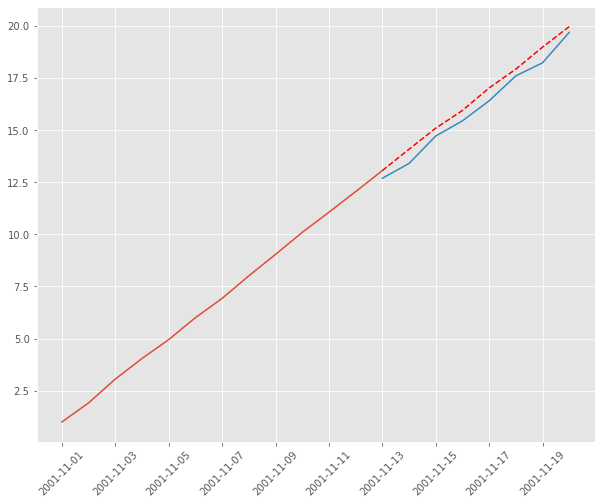

In [65]:
plt.figure(figsize= (10, 8))
plt.plot(train)  # 2001년 11월 13일까지의 실제값
plt.plot(test, 'r--')  # 2001년 11월 13일부터의 실제값
plt.plot(preds)  # 예측값

plt.yticks(fontsize= 10)
plt.xticks(fontsize= 10, rotation= 45)
plt.show()